<a href="https://colab.research.google.com/github/chandanXP/BabyDressWeb/blob/main/machine_learning_algorithms_for_beginners/machine_learning_algorithms_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Algorithms for Beginners Code Examples

Tutorial: https://towardsai.net/p/machine-learning/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa
Github: https://github.com/towardsai/tutorials/tree/master/machine_learning_algorithms_for_beginners

# Linear Regression Example

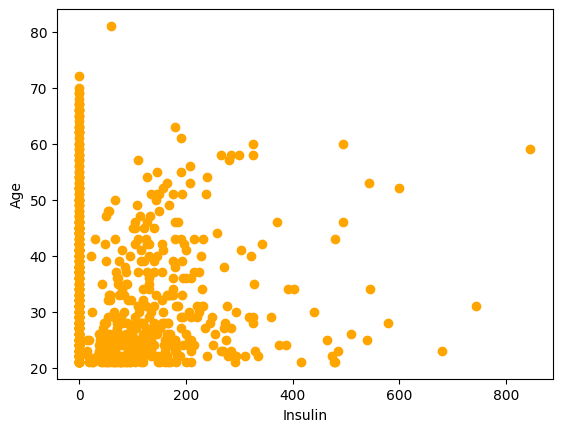

coefficients :  [[-0.10807599]]
Intercept :  [83.88748017]
Estimated  Diabetes : 67.6760822425286
Mean absolute error: 42.21
Mean sum of squares (MSE): 1997.83
R2-score: -13.27


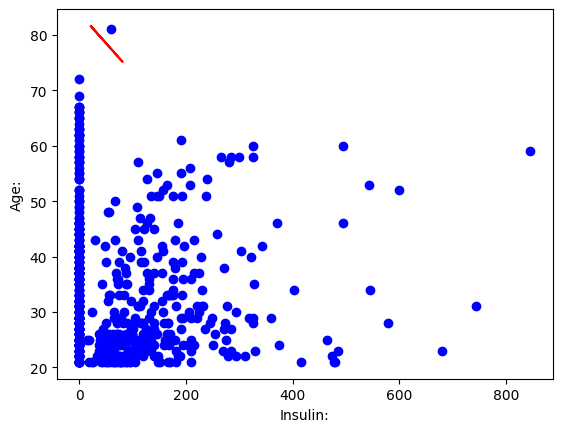

In [7]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# Read the CSV file :
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()
# Let's select some features to explore more :
data = data[["ENGINESIZE","CO2EMISSIONS"]]
# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data["ENGINESIZE"] , data["CO2EMISSIONS"] , color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
# The coefficients:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept
# Plotting the regression line:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values
# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission :",estimatd_emission)
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

# Multivariable Linear Regression

In [ ]:
# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# Read the CSV file:
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()
# Consider features we want to work on:
X = data[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Y = data["CO2EMISSIONS"]
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]
#Modeling:
#Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
train_y = np.array(train["CO2EMISSIONS"])
regr.fit(train_x,train_y)
test_x = np.array(test[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
test_y = np.array(test["CO2EMISSIONS"])
# print the coefficient values:
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=["Coefficients"])
coeff_data
#Now let's do prediction of data:
Y_pred = regr.predict(test_x)
# Check accuracy:
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
print ("R² :",R)

R² : 0.9362912548588906


# Polynomial Regression

404.4306194559573

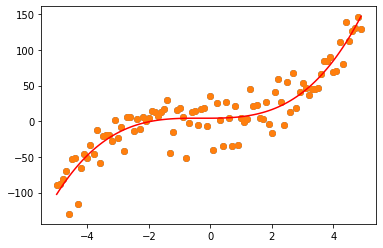

In [ ]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
# Generate datapoints:
x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y)
# Make polynomial data:
x1 = x
x2 = np.power(x1,2)
x3 = np.power(x1,3)
n = len(x1)
# Reshaping data:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))
# First column of matrix X:
x_bias = np.ones((n,1))
# Form the complete x matrix:
x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)
# Finding transpose:
x_new_transpose = np.transpose(x_new)
# Finding dot product of original and transposed matrix :
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)
# Finding Inverse:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)# Finding the dot product of transposed x and y :
temp_2 = x_new_transpose.dot(y)
# Finding coefficients:
theta = temp_1.dot(temp_2)
theta
# Store coefficient values in different variables:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]
# Plot the polynomial curve:
plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="red")
# Prediction function:
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
 y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
 return y_pred

# Making predictions:
pred = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)

# Calculate accuracy of model:
def err(y_pred,y):
 var = (y - y_pred)
 var = var*var
 n = len(var)
 MSE = var.sum()
 MSE = MSE/n

 return MSE
# Calculating the error:
error = err(pred,y)
error

# Exponential Regression

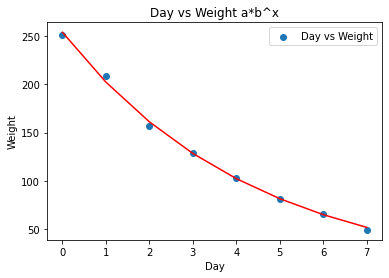

The equation of regression line is y=254.0486*0.7964^x


In [ ]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Dataset values :
day = np.arange(0,8)
weight = np.array([251,209,157,129,103,81,66,49])
# Exponential Function :
def expo_func(x, a, b):
 return a * b ** x
#popt :Optimal values for the parameters
#pcov :The estimated covariance of popt
popt, pcov = curve_fit(expo_func, day, weight)
weight_pred = expo_func(day,popt[0],popt[1])
# Plotting the data
plt.plot(day, weight_pred, 'r-')
plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()
# Equation
a=popt[0].round(4)
b=popt[1].round(4)
print(f'The equation of regression line is y={a}*{b}^x')

# Sinusoidal Regression

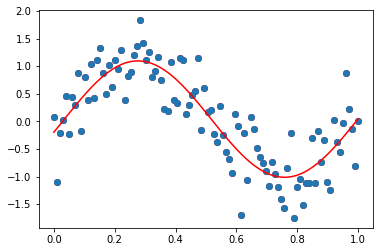

0.7440255048983322


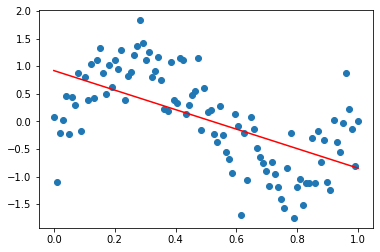

Accuracy of Linear Model :  0.3723160356057551


In [ ]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
# Generating dataset:
# Y = A*sin(B(X + C)) + D
# A = Amplitude
# Period = 2*pi/B
# Period = Length of One Cycle
# C = Phase Shift (In Radian)
# D = Vertical Shift
X = np.linspace(0,1,100) #(Start,End,Points)
# Here…
# A = 1
# B= 2*pi
# B = 2*pi/Period
# Period = 1
# C = 0
# D = 0
Y = 1*np.sin(2*np.pi*X)
# Adding some Noise :
Noise = 0.4*np.random.normal(size=100)
Y_data = Y + Noise
plt.scatter(X,Y_data,c="r")
# Calculate the value:
def calc_sine(x,a,b,c,d):
 return a * np.sin(b* ( x + np.radians(c))) + d
# Finding optimal parameters :
popt,pcov = curve_fit(calc_sine,X,Y_data)
# Plot the main data :
plt.scatter(X,Y_data)# Plot the best fit curve :
plt.plot(X,calc_sine(X,*popt),c="r")
plt.show()
# Check the accuracy :
Accuracy =r2_score(Y_data,calc_sine(X,*popt))
print (Accuracy)
# Function to calculate the value :
def calc_line(X,m,b):
 return b + X*m
# It returns optimized parametes for our function :
# popt stores optimal parameters
# pcov stores the covarience between each parameters.
popt,pcov = curve_fit(calc_line,X,Y_data)
# Plot the main data :
plt.scatter(X,Y_data)
# Plot the best fit line :
plt.plot(X,calc_line(X,*popt),c="r")
plt.show()
# Check the accuracy of model :
Accuracy =r2_score(Y_data,calc_line(X,*popt))
print ("Accuracy of Linear Model : ",Accuracy)

# Logarithmic Regression

(98,)
(98, 1)
(98, 1)
0.9702462770235498


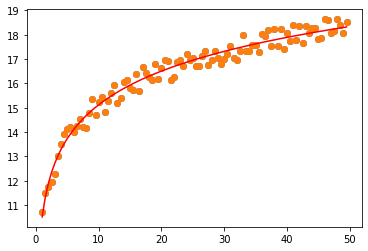

In [ ]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# Dataset:
# Y = a + b*ln(X)
X = np.arange(1,50,0.5)
Y = 10 + 2*np.log(X)
#Adding some noise to calculate error!
Y_noise = np.random.rand(len(Y))
Y = Y +Y_noise
plt.scatter(X,Y)
# 1st column of our X matrix should be 1:
n = len(X)
x_bias = np.ones((n,1))
print (X.shape)
print (x_bias.shape)
# Reshaping X :
X = np.reshape(X,(n,1))
print (X.shape)
# Going with the formula:
# Y = a + b*ln(X)
X_log = np.log(X)
# Append the X_log to X_bias:
x_new = np.append(x_bias,X_log,axis=1)
# Transpose of a matrix:
x_new_transpose = np.transpose(x_new)
# Matrix multiplication:
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)
# Find inverse:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)
# Matrix Multiplication:
temp_2 = x_new_transpose.dot(Y)
# Find the coefficient values:
theta = temp_1.dot(temp_2)
# Plot the data:
a = theta[0]
b = theta[1]
Y_plot = a + b*np.log(X)
plt.scatter(X,Y)
plt.plot(X,Y_plot,c="r")
# Check the accuracy:
Accuracy = r2_score(Y,Y_plot)
print (Accuracy)